## Problem Statement 2: Overfitting and Underfitting Analysis using Regression/Classification Models

In this task, a detailed analysis of overfitting and underfitting issues using various regression/classification models on multiple datasets are performed.


### **Dataset Selection and Preparation**:
   - Downloaded the following datasets:
     - [Mobile Price Classification Dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)
     - [Housing Price Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)
     - [Melbourne Housing Snapshot Dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot)



### Import necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### **Load Datasets**

In [19]:
# Load datasets

train_df = pd.read_csv('mobile_price_train.csv')
test_df = pd.read_csv('mobile_price_test.csv')

train_df.head()




,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Exploratory Data Analysis**

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [21]:
train_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [22]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

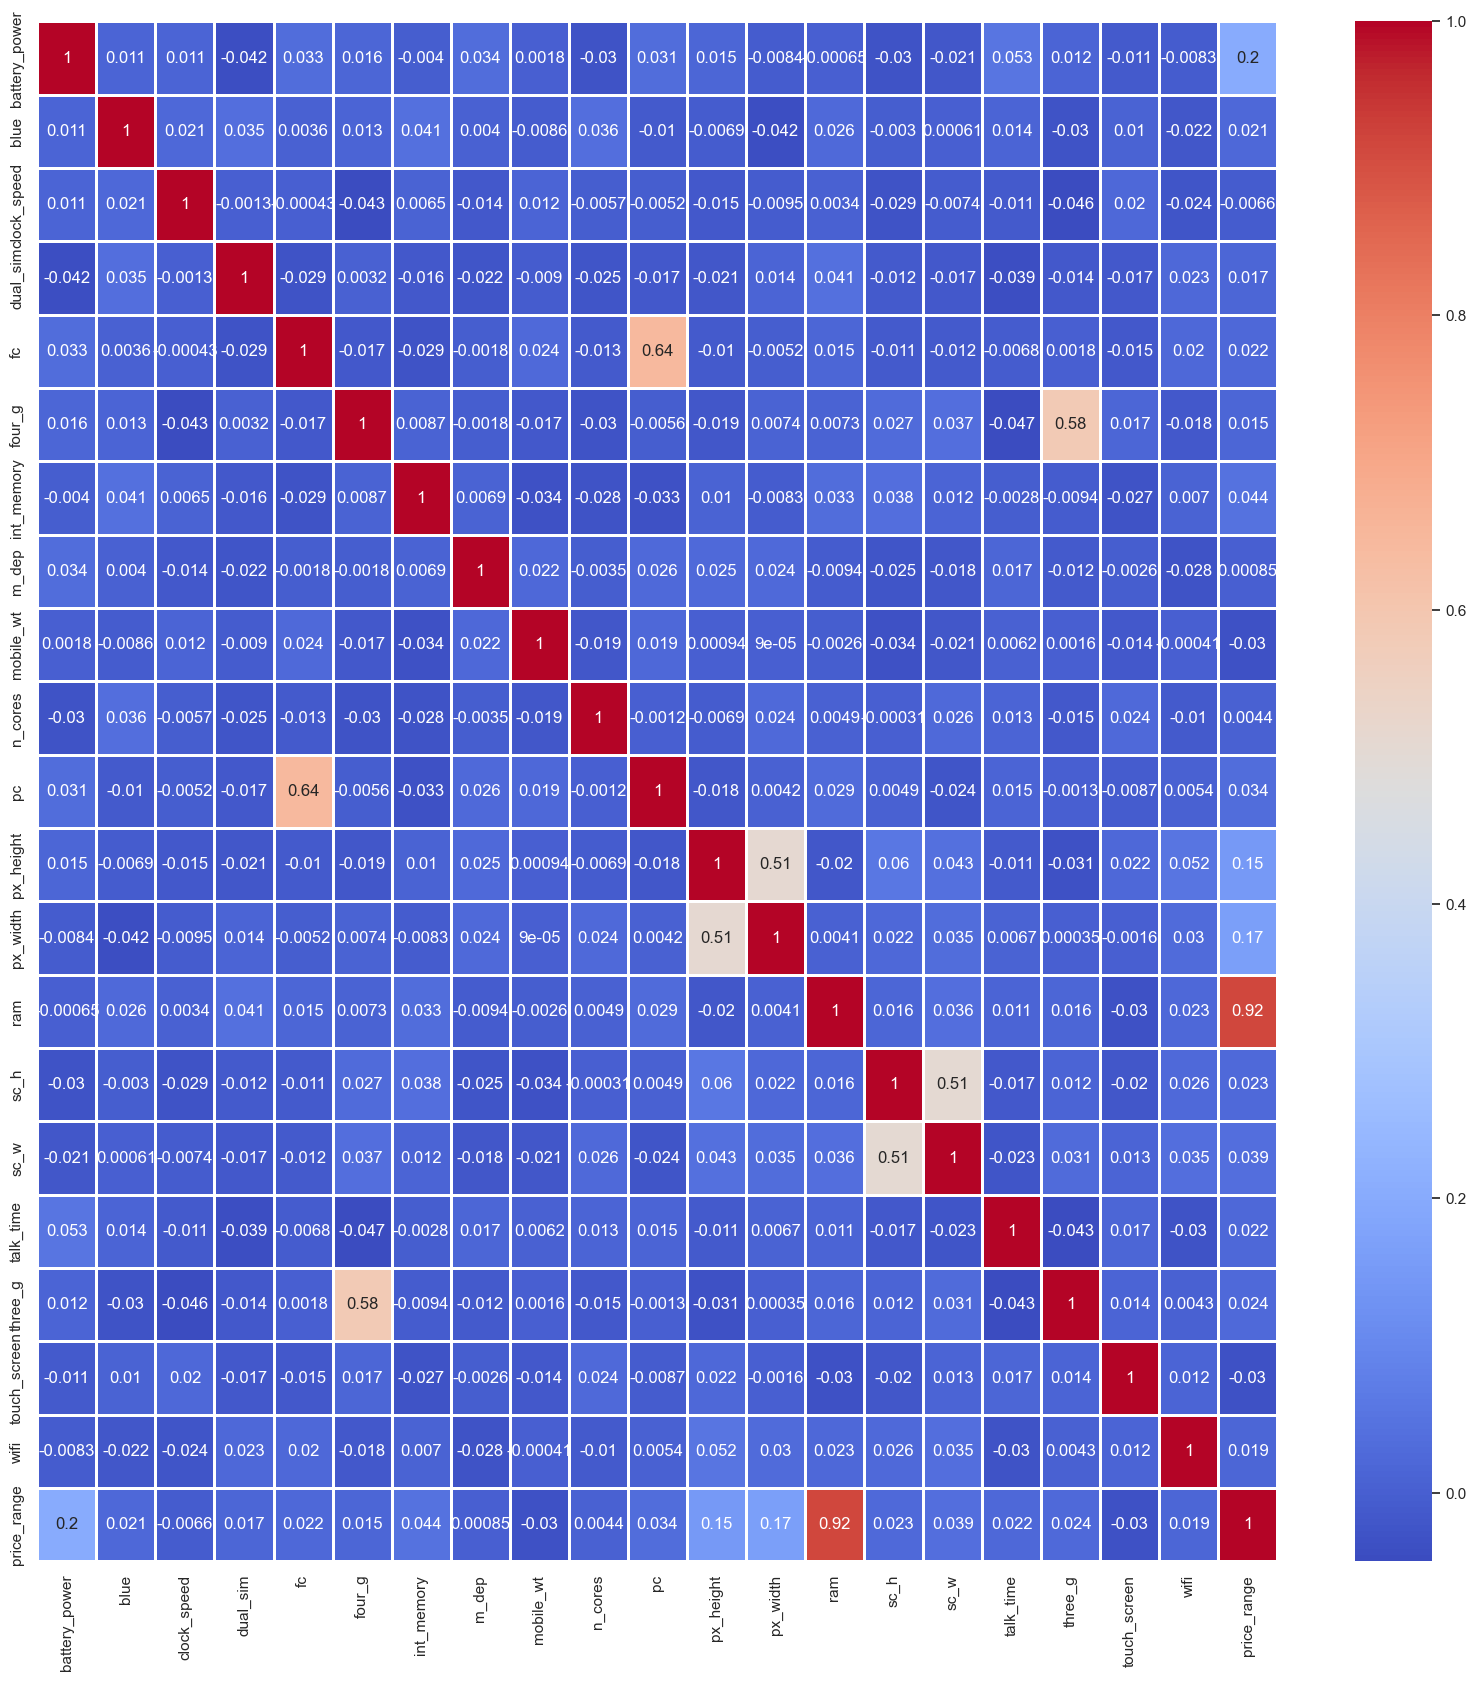

In [24]:
# Find the correlation between the features
corr = train_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=2)
plt.show()

<Axes: xlabel='price_range', ylabel='m_dep'>

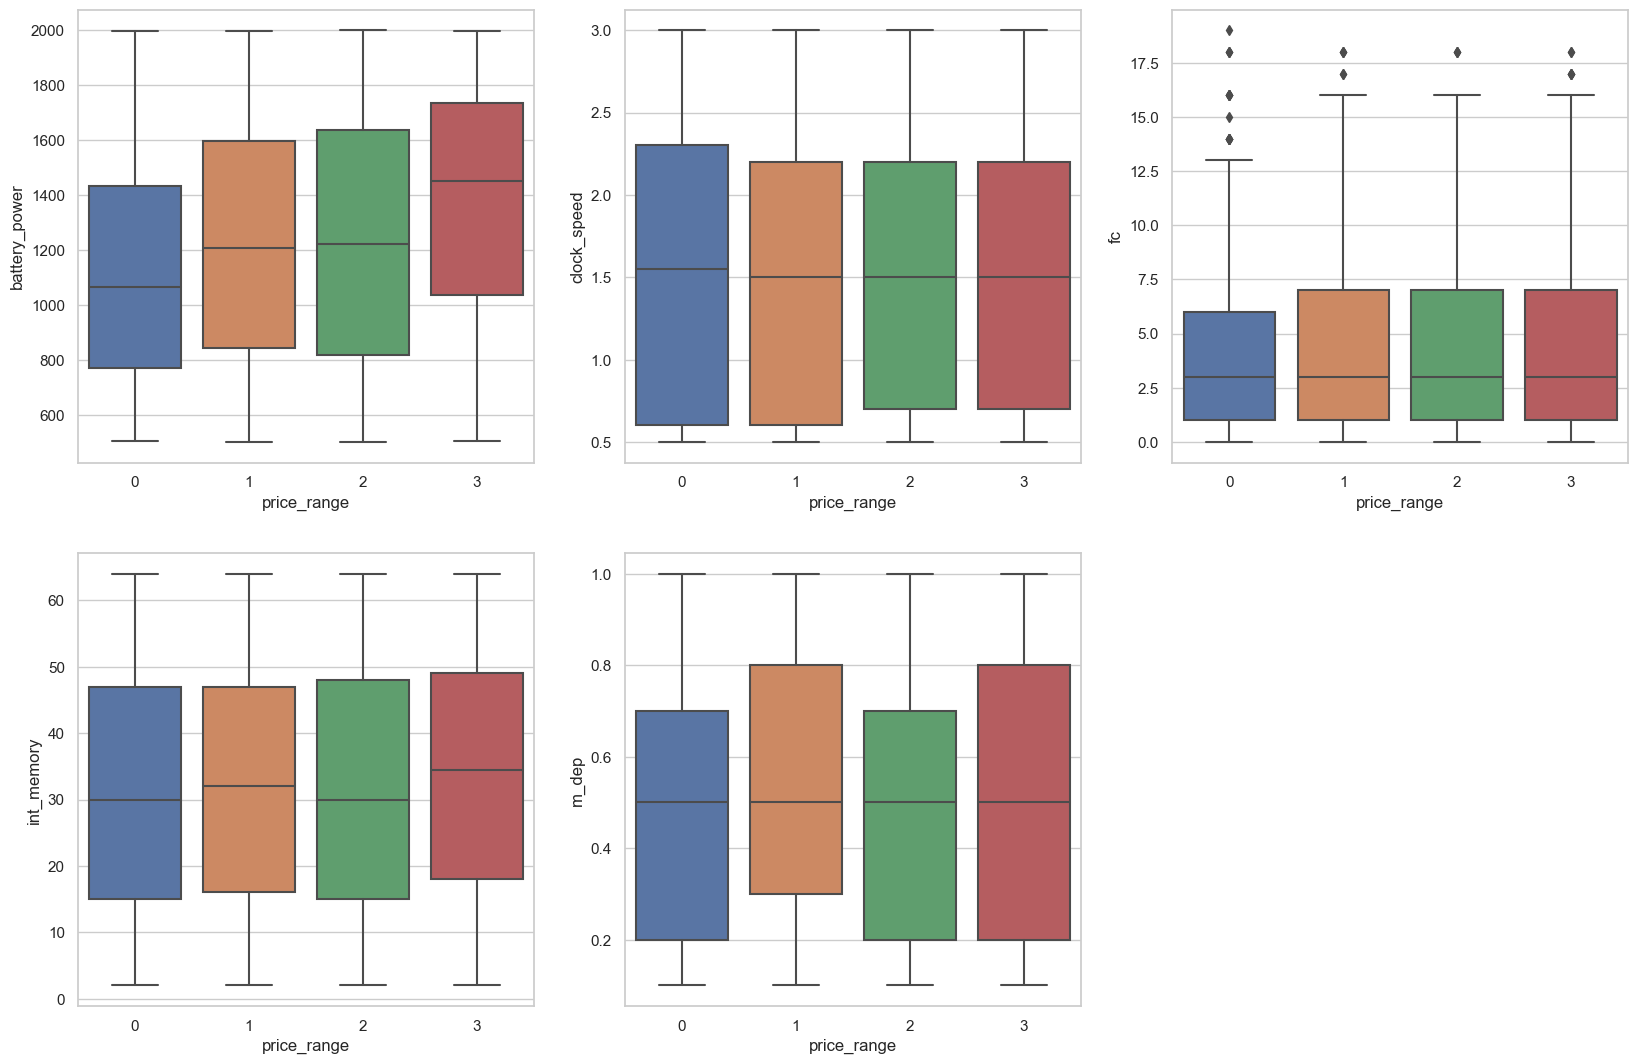

In [25]:
# Visualize the features
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)

sns.boxplot(x='price_range', y='battery_power', data=train_df)


plt.subplot(3,3,2)
sns.boxplot(x='price_range', y='clock_speed', data=train_df)


plt.subplot(3,3,3)
sns.boxplot(x='price_range', y='fc', data=train_df)


plt.subplot(3,3,4)
sns.boxplot(x='price_range', y='int_memory', data=train_df)

plt.subplot(3,3,5)
sns.boxplot(x='price_range', y='m_dep', data=train_df)

The boxplots in the image illustrate the distribution of different features across various price ranges in the mobile price classification dataset. Let's analyze the insights for each feature:

### 1. Battery Power
- **Observation**: Higher price ranges tend to have higher battery power. 
- **Insight**: Battery power is positively correlated with the price range, indicating that more expensive mobiles generally have better battery capacity.

### 2. Clock Speed
- **Observation**: Clock speed appears to be relatively consistent across different price ranges, though there is a slight increase in the median value for higher price ranges.
- **Insight**: While clock speed is somewhat related to price, it is not a strong differentiator among the different price ranges.

### 3. Front Camera (fc)
- **Observation**: Higher price ranges tend to have higher front camera megapixels. There are more outliers in higher price ranges, indicating some models have particularly high front camera specs.
- **Insight**: The front camera quality is generally better in more expensive phones, which could be a significant feature for the price classification.

### 4. Internal Memory (int_memory)
- **Observation**: Internal memory does not show a strong trend across the price ranges. The distributions are quite similar.
- **Insight**: Internal memory alone may not be a good predictor for the price range, as it doesn't vary much between different price levels.

### 5. Mobile Depth (m_dep)
- **Observation**: Mobile depth appears fairly consistent across different price ranges, with a slight increase in median for higher price ranges.
- **Insight**: Mobile depth is likely not a strong indicator of price, though there might be a minor correlation.



### **Data Preprocessing**

In [26]:
# Normalize Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

X = scaler.fit_transform(X)

In [27]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

### **Model Development & Model Evaluation**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Cross-validation scores: [0.95     0.95     0.946875 0.934375 0.96875 ]
Multionmoial Logistic Regression Accuracy score =  0.9775


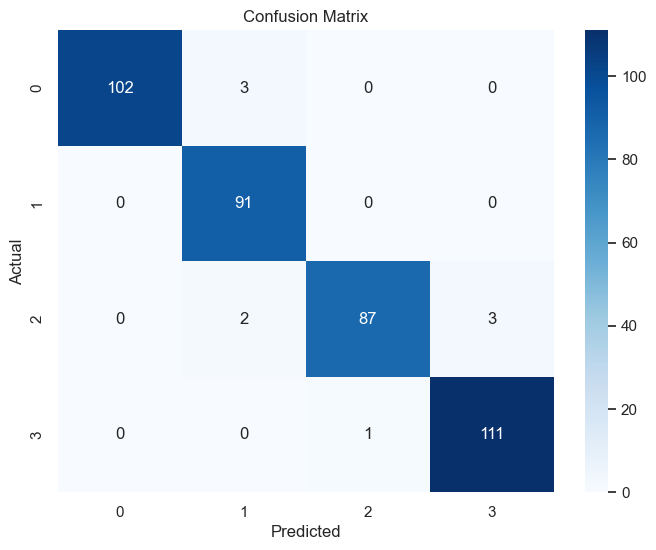

Train Accuracy: 0.975625
Test Accuracy: 0.9775
Mean Squared Error: 0.0225
Root Mean Squared Error: 0.15
Mean Absolute Error: 0.0225
R Squared: 0.9831365145986256


In [29]:
clf = LogisticRegression(multi_class = 'multinomial',solver='lbfgs', max_iter=500)
clf.fit(X_train,y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred =clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print("Multionmoial Logistic Regression Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Both Test and Train Accuracy
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Squared:", r_squared)







Cross-validation scores: [0.81875  0.853125 0.84375  0.803125 0.834375]
Decision Tree Classifier Accuracy score =  0.845


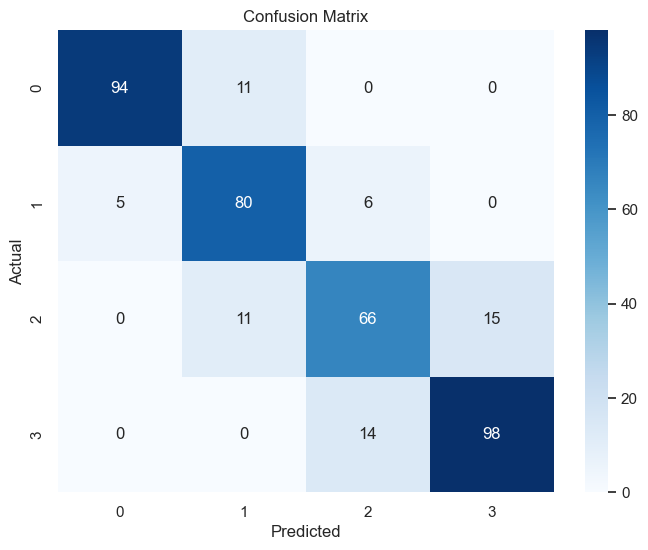

Train Accuracy: 1.0
Test Accuracy: 0.845
Mean Squared Error: 0.155
Root Mean Squared Error: 0.39370039370059057
Mean Absolute Error: 0.155
R Squared: 0.8838293227905321


In [30]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Decision Tree Classifier Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Both Test and Train Accuracy
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Squared:", r_squared)

Cross-validation scores: [0.8375   0.909375 0.88125  0.815625 0.853125]
Random Forest Classifier Accuracy score =  0.895


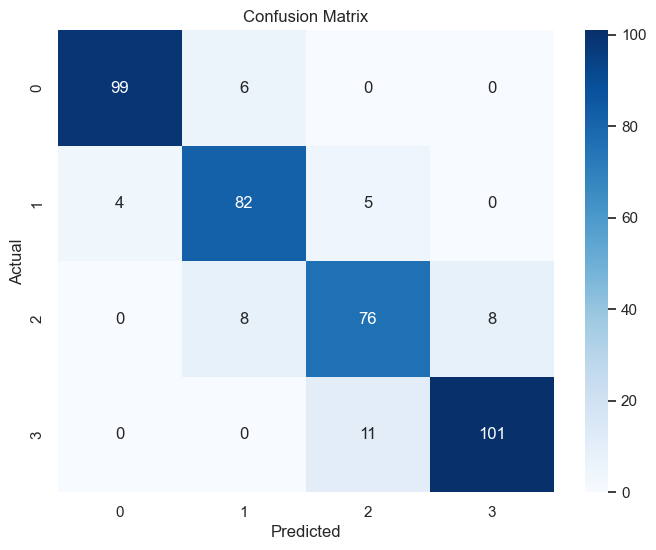

Train Accuracy: 1.0
Test Accuracy: 0.895
Mean Squared Error: 0.105
Root Mean Squared Error: 0.324037034920393
Mean Absolute Error: 0.105
R Squared: 0.9213037347935863


In [31]:
# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Both Test and Train Accuracy
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Squared:", r_squared)


Cross-validation scores: [0.853125 0.89375  0.878125 0.846875 0.85    ]
SVM Accuracy score =  0.8925


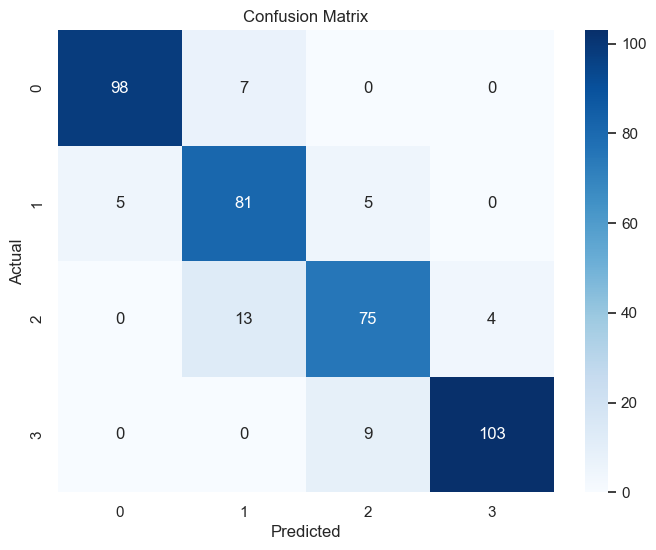

Train Accuracy: 0.9825
Test Accuracy: 0.8925
Mean Squared Error: 0.1075
Root Mean Squared Error: 0.32787192621510003
Mean Absolute Error: 0.1075
R Squared: 0.9194300141934335


In [32]:
# SVM
clf = SVC()
clf.fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("SVM Accuracy score = ", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Both Test and Train Accuracy
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Squared:", r_squared)


### **Overfiting/Underfitting Analysis**

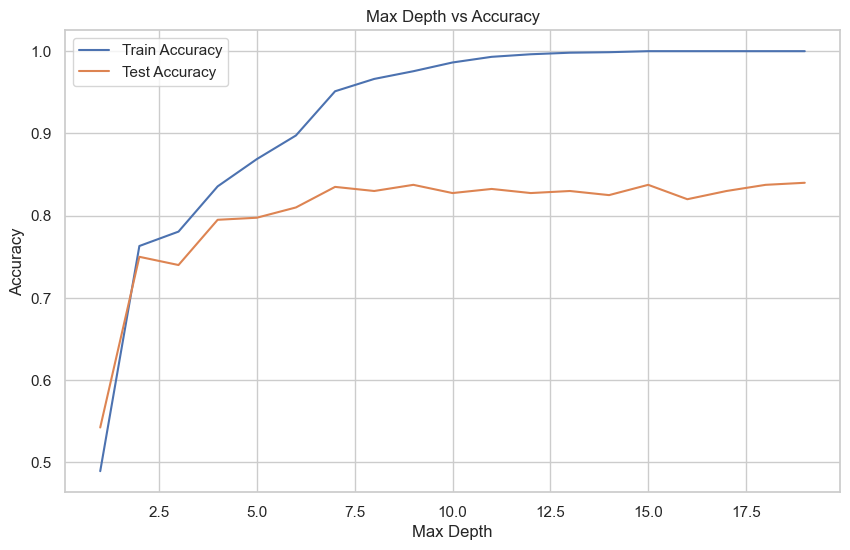

In [33]:
#Overfitting/Underfitting Analaysis
train_accuracy = []
test_accuracy = []

for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 20), test_accuracy, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.show()


The graph illustrates the relationship between the maximum depth of a decision tree and the accuracy of the model on both the training and testing datasets. Here's a detailed analysis and conclusion based on the provided graph:

### Analysis

1. **Training Accuracy:**
   - The training accuracy increases consistently with the increase in the maximum depth of the tree.
   - At a maximum depth of around 15, the training accuracy reaches nearly 100%, indicating that the model is perfectly fitting the training data.

2. **Testing Accuracy:**
   - The testing accuracy increases initially and reaches its peak at a maximum depth of around 7.
   - Beyond this point, the testing accuracy starts to fluctuate and gradually decreases, indicating that the model is overfitting the training data when the tree depth increases beyond this point.

### Conclusion

1. **Overfitting:**
   - The model is clearly overfitting the training data at higher depths (beyond depth 7). This is evident from the high training accuracy and the decreasing testing accuracy as the tree depth increases.
   - Overfitting occurs when the model learns the noise in the training data and loses its ability to generalize to new, unseen data.

2. **Optimal Tree Depth:**
   - The optimal tree depth for this model, based on the graph, is around 7. At this point, the model achieves the highest testing accuracy, balancing between bias and variance.
   - Choosing a tree depth greater than 7 results in diminishing returns on testing accuracy and increased risk of overfitting.

3. **Recommendation:**
   - To improve model performance and address overfitting, it is recommended to set the maximum tree depth to around 7.
   - Additionally, consider using techniques such as pruning, cross-validation, and ensembling methods (like Random Forests or Gradient Boosting) to further enhance the model's generalization capability.


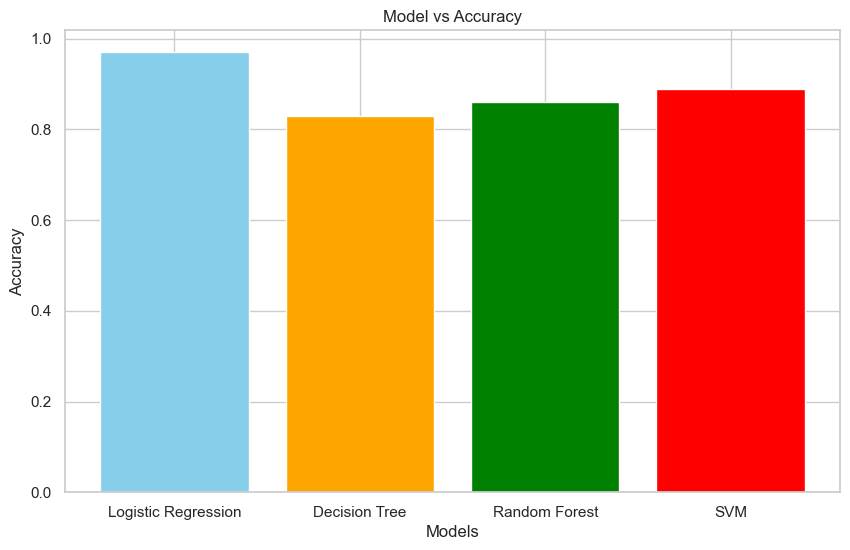

In [34]:
# Compare all models using Plots
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.97, 0.83, 0.86, 0.89]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model vs Accuracy')
plt.show()



The bar chart compares the accuracy of four different machine learning models: Logistic Regression, Decision Tree, Random Forest, and SVM.  Here's what we can observe:

* **Logistic Regression** has the highest accuracy, reaching nearly 1.0. 
* **SVM** comes in second with an accuracy slightly below Logistic Regression. 
* **Decision Tree** and **Random Forest** have lower accuracy scores, with Decision Tree slightly outperforming Random Forest. 


